In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error # for␣evaluating ml models

**Dataset**

In [ ]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#last 5 rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# checking the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.duplicated().value_counts()

,count
False,1337
True,1


In [ ]:
df = df.drop_duplicates()
df.duplicated().value_counts()


,count
False,1337


In [ ]:
# unique values
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [ ]:
# checking duplicate values
df.duplicated().value_counts()

,count
False,1337


In [ ]:
# droping duplicate values
df.drop_duplicates(inplace=True)

<ipython-input-265-5d23ee541f32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
# rows, columns
df.shape

(1337, 7)

In [ ]:
#rows*columns
df.size

9359

**Exploratory Data Analysis**

Check for outliers

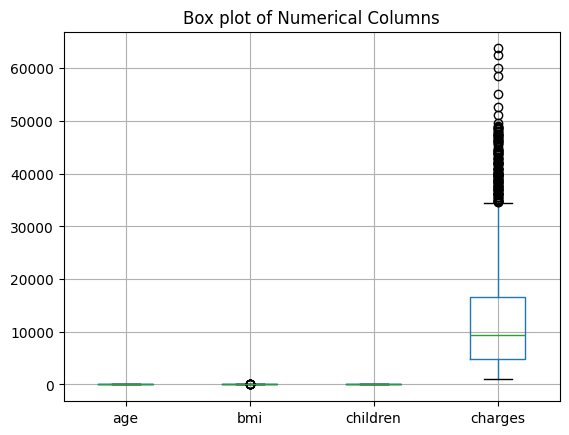

In [ ]:
df.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

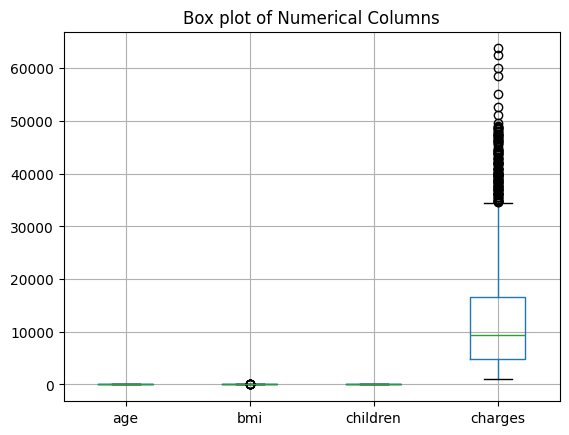

In [ ]:
# after removing outliers
df.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


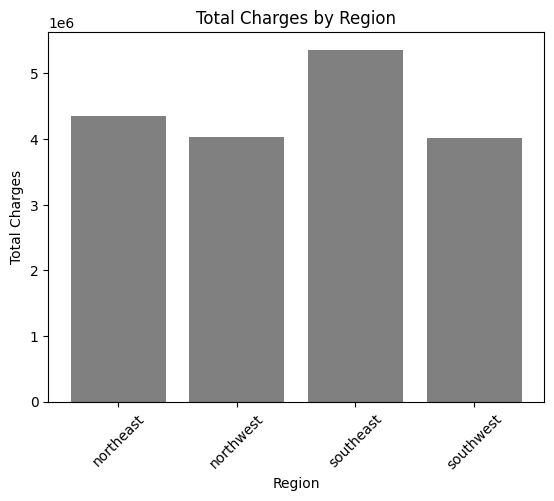

In [ ]:
# Calculate the total charges by region
charges_by_region = df.groupby('region')['charges'].sum()

plt.bar(charges_by_region.index, charges_by_region.values, color='grey')
plt.xlabel('Region')
plt.ylabel('Total Charges')
plt.title('Total Charges by Region')
plt.xticks(rotation=45)
plt.show()

<ipython-input-272-e9ac67b64a62>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sex', data=df, palette=color_palette)


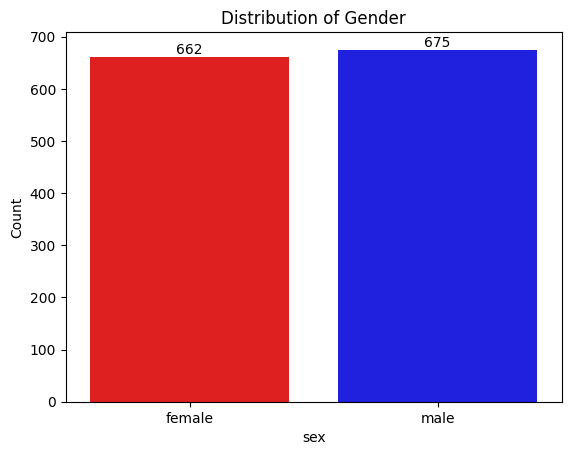

In [ ]:
color_palette = {'male': 'blue', 'female': 'red'}

# Create the plot
ax = sns.countplot(x='sex', data=df, palette=color_palette)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Labeling

plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


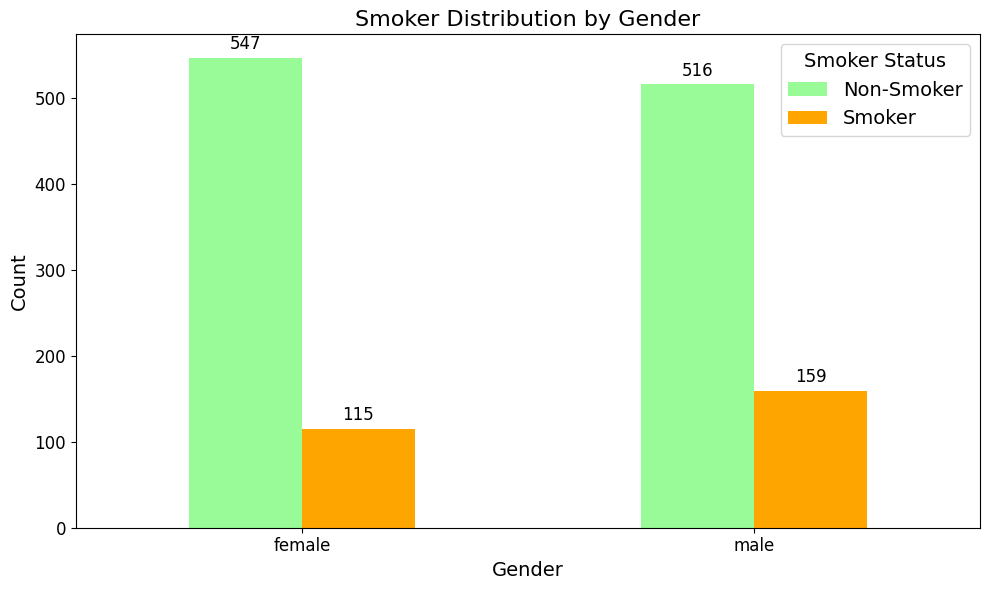

In [ ]:
gender_smoker_counts = df.groupby(['sex', 'smoker']).size().unstack(fill_value=0)

ax = gender_smoker_counts.plot(kind='bar', figsize=(10, 6), color=['#98FB98', '#FFA500'])  # Mint and orange colors

plt.title('Smoker Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),  # Adjust vertical offset for better placement
                textcoords='offset points', fontsize=12)

plt.legend(['Non-Smoker', 'Smoker'], fontsize=14, title='Smoker Status', title_fontsize=14)

plt.tight_layout()
plt.show()


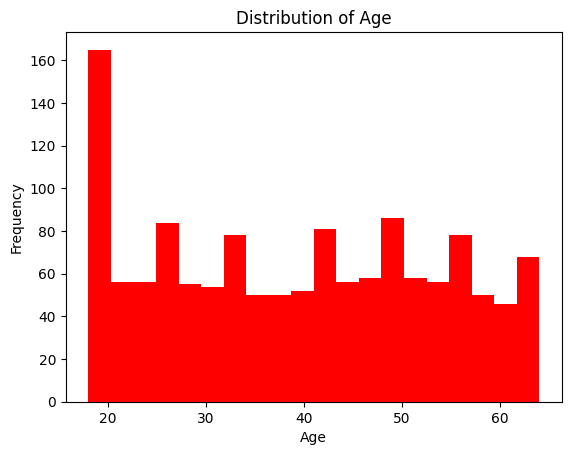

In [ ]:
df['age'].plot(kind='hist', bins=20, color='red')

plt.xlabel('Age')
plt.title('Distribution of Age')

plt.show()

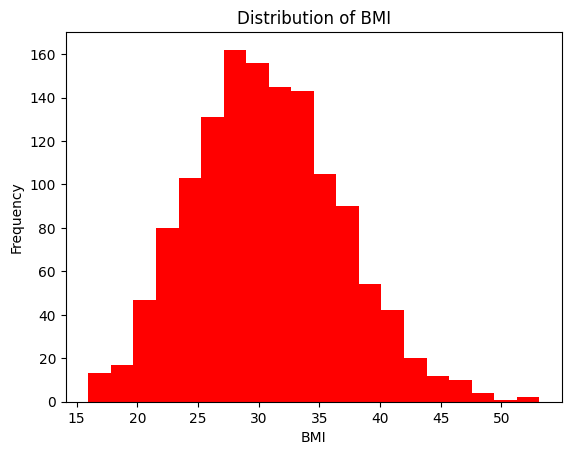

In [ ]:
df['bmi'].plot(kind='hist', bins=20, color='r')
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

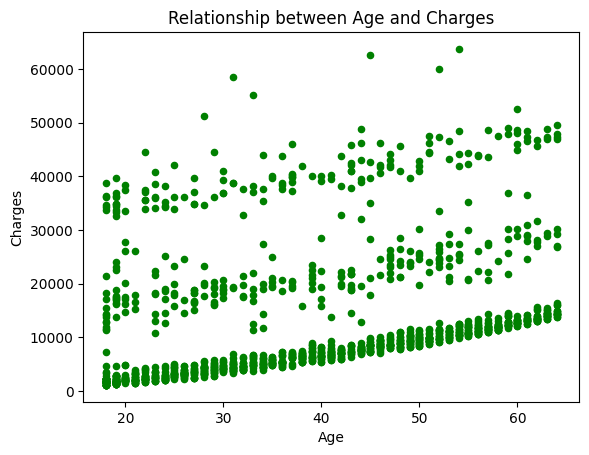

In [ ]:
# relationship between age and charges using scatterplot
df.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

There is a linearly increasing relationship between age and insurance charges. Older people are tend to be charged more

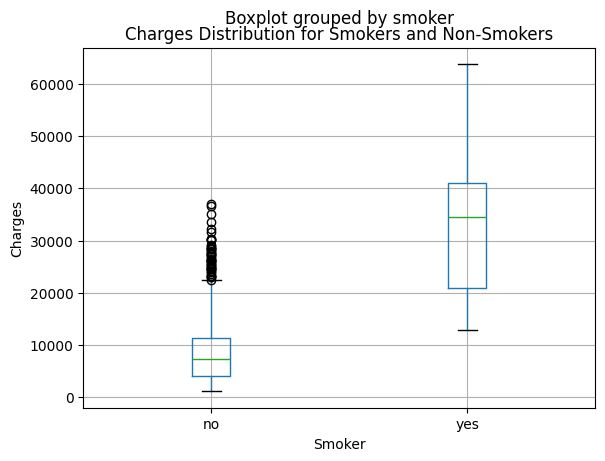

In [ ]:
# charges distribution for smokers vs non-smokers using boxplot
df.boxplot(column='charges', by='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()

**Feature Engineering**

In [ ]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df

<ipython-input-278-e83b8681e4fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
<ipython-input-278-e83b8681e4fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [ ]:
df_encoded = pd.get_dummies(df, columns=['region'], prefix='region', dtype=int)
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1292,21,1,23.210,0,0,1515.34490,0,0,1,0
1084,62,0,30.495,2,0,15019.76005,0,1,0,0
728,18,0,40.280,0,0,2217.60120,1,0,0,0
60,43,1,27.360,3,0,8606.21740,1,0,0,0


**Correlation Analysis**

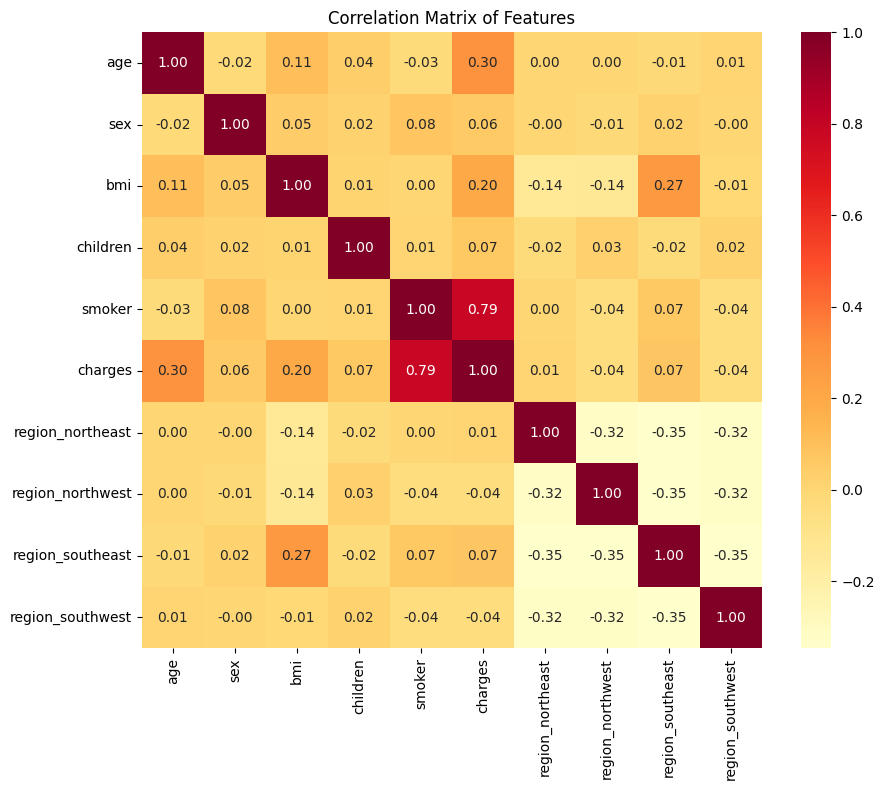

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


Only age and smoking turned out to be relevant feature based on correlation analysis

**Modelling**

In [ ]:
X = df_encoded[['age', 'bmi', 'children', 'smoker']]
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_features = ['age', 'bmi', 'children']
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

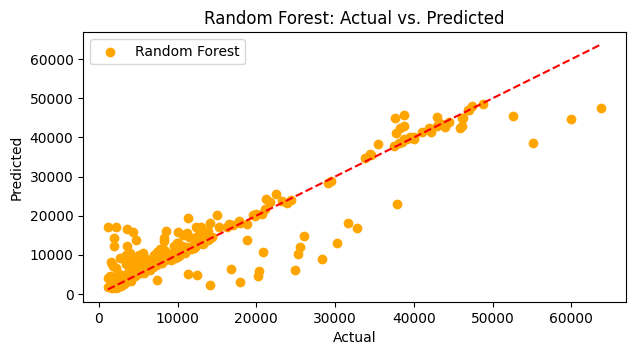

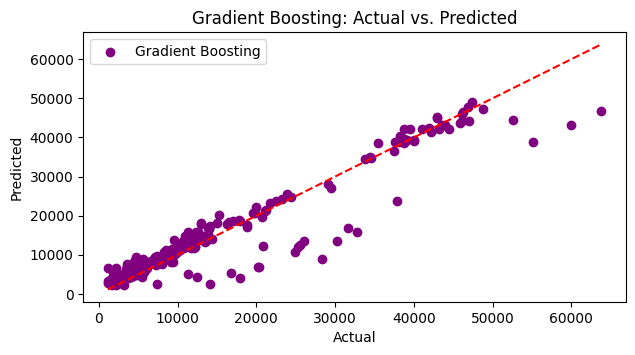

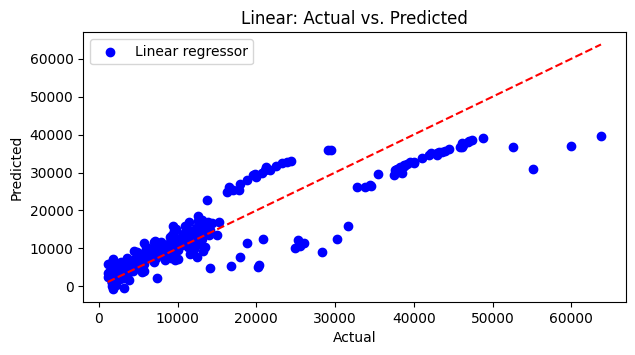

In [ ]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(7, 3.5))
plt.scatter(y_test, rf_predictions, color='orange', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

# Plot actual vs. predicted values for Gradient Boosting
plt.figure(figsize=(7, 3.5))
plt.scatter(y_test, gb_predictions, color='purple', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

# Plot actual vs. predicted values for Gradient Boosting
plt.figure(figsize=(7, 3.5))
plt.scatter(y_test, lr_predictions, color='blue', label='Linear regressor')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [ ]:
print("Random Forest - MSE: ", rf_mse)
print("Random Forest - RMSE: ", np.sqrt(rf_mse))
print("Random Forest - MAE: ", rf_mae)
print("Random Forest - r2: ", rf_model.score(X_test, y_test))
print("Gradient Boosting - MSE: ", gb_mse)
print("Gradient Boosting - RMSE: ", np.sqrt(gb_mse))
print("Gradient Boosting - MAE: ", gb_mae)
print("Gradient Boosting- r2: ", gb_model.score(X_test, y_test))
print("Linear regressor - MSE: ", lr_mse)
print("Linear regressor - RMSE: ", np.sqrt(lr_mse))
print("Linear regressor - MAE: ", lr_mae)
print("Linear regressor- r2: ", lr_model.score(X_test, y_test))


Random Forest - MSE:  24816730.297474127
Random Forest - RMSE:  4981.639318284106
Random Forest - MAE:  2801.8714696734182
Random Forest - r2:  0.8649474213165365
Gradient Boosting - MSE:  18135558.90384689
Gradient Boosting - RMSE:  4258.586491295779
Gradient Boosting - MAE:  2474.9481182975624
Gradient Boosting- r2:  0.9013063378425942
Linear regressor - MSE:  35914551.480433635
Linear regressor - RMSE:  5992.875059638206
Linear regressor - MAE:  4198.592612356365
Linear regressor- r2:  0.8045531086669288


In [ ]:
print("\n--- Linear Regressor ---")
print("MSE:  {:.2f}".format(lr_mse))
print("RMSE: {:.2f}".format(np.sqrt(lr_mse)))
print("MAE:  {:.2f}".format(lr_mae))
print("R2:   {:.4f}".format(lr_model.score(X_test, y_test)))

print("\n--- Random Forest Regressor ---")
print("MSE:  {:.2f}".format(rf_mse))
print("RMSE: {:.2f}".format(np.sqrt(rf_mse)))
print("MAE:  {:.2f}".format(rf_mae))
print("R2:   {:.4f}".format(rf_model.score(X_test, y_test)))

print("\n--- Gradient Boosting Regressor ---")
print("MSE:  {:.2f}".format(gb_mse))
print("RMSE: {:.2f}".format(np.sqrt(gb_mse)))
print("MAE:  {:.2f}".format(gb_mae))
print("R2:   {:.4f}".format(gb_model.score(X_test, y_test)))




--- Linear Regressor ---
MSE:  35914551.48
RMSE: 5992.88
MAE:  4198.59
R2:   0.8046

--- Random Forest Regressor ---
MSE:  24816730.30
RMSE: 4981.64
MAE:  2801.87
R2:   0.8649

--- Gradient Boosting Regressor ---
MSE:  18135558.90
RMSE: 4258.59
MAE:  2474.95
R2:   0.9013


**Feature Importance**

In [ ]:
# Random Forest
print("\n--- Random Forest Feature Importances ---")
importance = rf_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]:.4f}")

# Gradient Boosting
print("\n--- Gradient Boosting Feature Importances ---")
importance = gb_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]:.4f}")

# Linear Regression
print("\n--- Linear Regression Coefficients ---")
coefficients = lr_model.coef_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {coefficients[i]:.4f}")



--- Random Forest Feature Importances ---
age: 0.1415
bmi: 0.2366
children: 0.0256
smoker: 0.5963

--- Gradient Boosting Feature Importances ---
age: 0.1239
bmi: 0.1904
children: 0.0146
smoker: 0.6712

--- Linear Regression Coefficients ---
age: 3486.6958
bmi: 1846.5656
children: 642.4269
smoker: 23042.5072


**Inference on sample data**

In [ ]:
new_data = pd.DataFrame({
    'age': [35],
    'sex': [1],
    'bmi': [25],
    'children': [2],
    'smoker': [0],
    'region_northeast': [0],
    'region_nortwest': [1],
    'region_southeast': [0],
    'region_southwest': [0]
})

new_data = new_data[X.columns]

# predictions
rf_predictions = rf_model.predict(new_data)
gb_predictions = gb_model.predict(new_data)
lr_predictions = lr_model.predict(new_data)

print("Random Forest Predictions:", rf_predictions)
print("Gradient Boosting Predictions:", gb_predictions)
print("Linear Regression Predictions:", lr_predictions)

Random Forest Predictions: [15697.4138769]
Gradient Boosting Predictions: [16945.05938781]
Linear Regression Predictions: [177900.73673007]
